In [12]:
from sklearn import datasets
import pandas as pd

# 데이터 불러오기
iris = datasets.load_iris()

# label값을 DataFrame에 넣기
labels = pd.DataFrame(iris.target, columns=['labels'])

# Features -> DataFrame
data = pd.DataFrame(iris.data, columns=['Sepal length','Sepal width','Petal length','Petal width'])
 
# features와 target 합치기
data = pd.concat([data,labels],axis=1)

data.head()
# labels
#

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


DBSCAN fitting

In [14]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# 모델 생성 및 예측
model = DBSCAN(eps=0.5, min_samples=5)
# 예측한 값을 DataFrame으로 만들어서 predict에 저장 
predict = pd.DataFrame(model.fit_predict(data), columns=['predict'])

# features, label, predict 모두 합치기
r = pd.concat([data,predict],axis=1)
r.head()

,Sepal length,Sepal width,Petal length,Petal width,labels,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


Pair plot

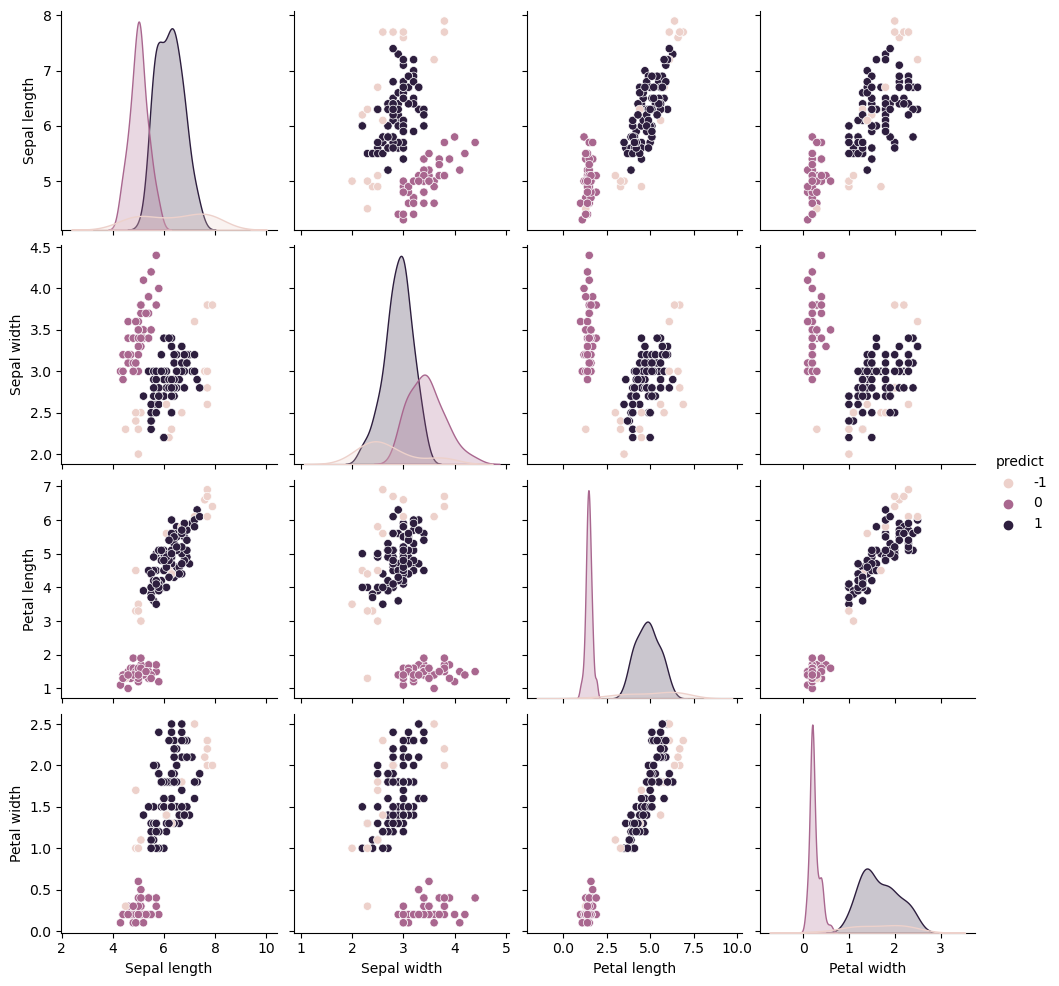

In [6]:
# pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show() 

#  K-means

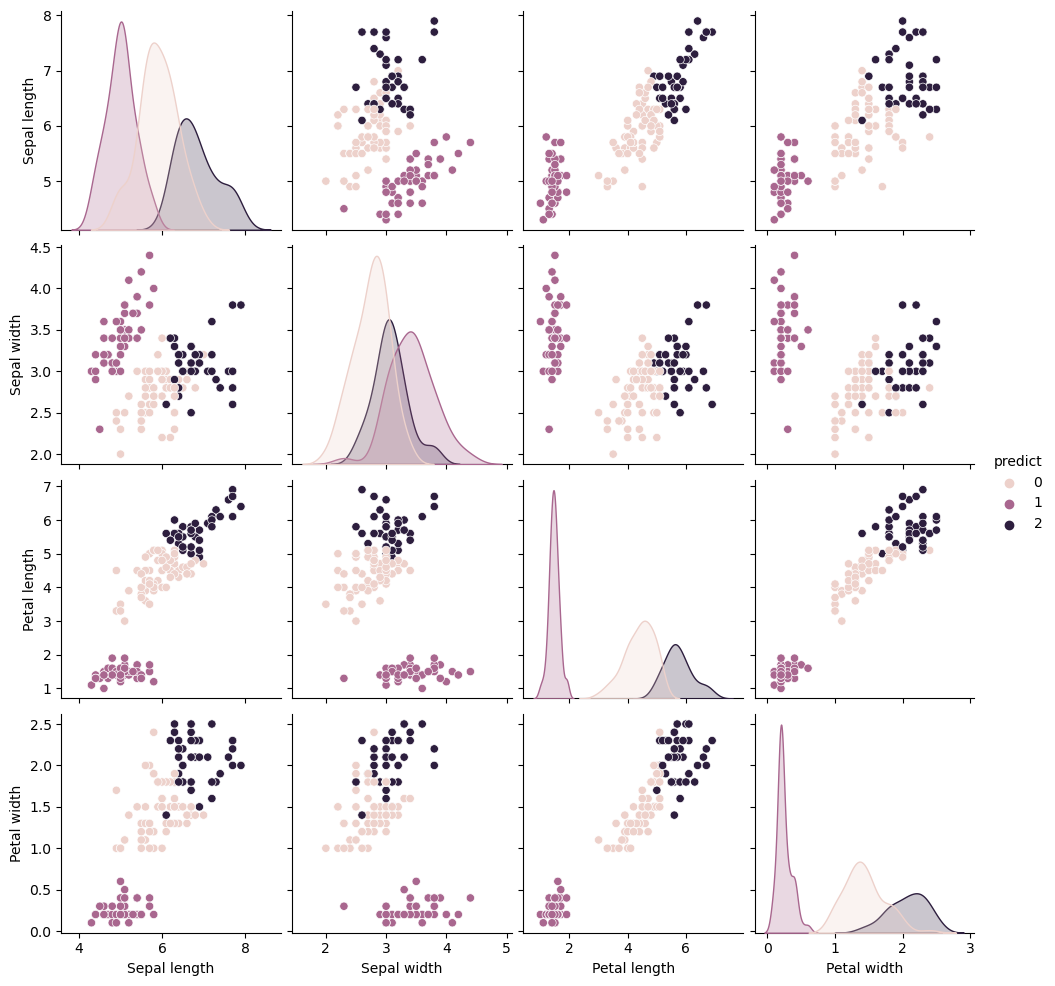

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,random_state=21)
km.fit(feature)

new_labels =pd.DataFrame(km.labels_) # km.labels_ 예측한 클러스트를 new_labels로 설정
new_labels.columns=['predict']

# 각각의 feature와 k-means로 예측한 값이랑 합친다.
r2 = pd.concat([feature,new_labels],axis=1)

#pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

- 결과를 비교해보면, 
- K-means가 훤신 성능이 좋다. 더 구분을 잘함. 
- 그 이유는 데이터의 특수성 때문이며 데이터마다 성격이 다르기 때문에
- 어떤 것이 좋다라고 말할 수 없다.


In [16]:
import numpy as np 
import pandas as pd 
from sklearn. datasets import make_moons 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
from scipy.cluster.hierarchy import dendrogram, ward 
from sklearn.preprocessing import StandardScaler 
import mglearn


# 경고창 피하는 코드
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

#Korean in plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False



## 군집 알고리즘 비교와 평가

- agglomerative algorithm의 어려운 점은 algorithm이 잘 작동하는지 평가하거나 여러 algorithm의 출력을 비교하기가 매우 어려움

![image](https://user-images.githubusercontent.com/87592790/198220229-34f314a1-3402-4825-9f6e-86c318ce0f16.png)



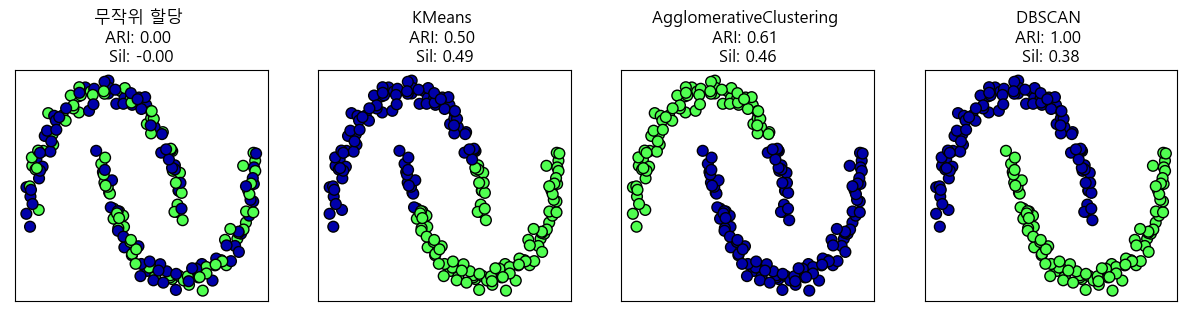

In [39]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
 
# 데이터셋
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 스케일링
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 군집분석 알고리즘 모델 리스트 만들기
# K-means, Agglomerative, DBSCAN을 각각 사용해서 비교할 것임
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 4가지 종류의 군집분석 결과를 시각화 할 것임(무작위 추가)
# 1행에 4개를 그릴것임
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터를 할당함
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터 시각화
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1],
                c=random_clusters,      # 클러스터 된대로 색을 지정할 거임
                cmap=mglearn.cm3,       # 색은 cm3으로 설정
                s=60,                   
                edgecolors='black')
# 산점도 제목 설정
axes[0].set_title("무작위 할당 \nARI: {:.2f} \nSil: {:.2f}".format(
                                           adjusted_rand_score(y, random_clusters),
                                           silhouette_score(X_scaled, random_clusters)))

# 나머지 3가지 군지화 모델에 대한 시각화
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1],
               c=clusters, 
               cmap=mglearn.cm3, 
               s=60, 
               edgecolors='black')
    ax.set_title("{} \nARI: {:.2f} \nSil: {:.2f}".format(
                                           algorithm.__class__.__name__, 
                                           adjusted_rand_score(y, clusters),
                                           silhouette_score(X_scaled, clusters)))
    

#### Clustering 평가
- 군집분석에서는 accuracy를 사용하면 비율을 중심으로 보는 것이 아니라 순서에 맞게 일치여부를 보기 때문에
- ARI나 NMI를 사용해야 한다.

#### Silhouse
- silhouse는 정확하지 않은 점수다.
- 클러스터의 밀집 정도를 계산하는 값이며 덤수가 높을수록 좋은 점수다.(최대점수 1)
- 데이터가 복잡할 때는 밀집도를 활용한 점수가 잘 맞지 않는다.
- (-1 : 잘못된 군집 / 0 : 중첩됨 / 1 : 잘 구분됨)

In [32]:
from sklearn.metrics import accuracy_score

cluster1 = [ 0, 0, 1, 1, 0]
cluster2 = [ 1, 1, 0, 0, 1]

# 순서(인덱스)별 일치 여부를 정확도로 본다.
print("정확도  : {:.2f}".format(accuracy_score(cluster1, cluster2)))

# 순서 상관없이 비율의 일치를 정확도로 본다.
print("정확도  : {:.2f}".format(adjusted_rand_score(cluster1, cluster2)))

정확도  : 0.00
정확도  : 1.00
